In [4]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

## Data Processing

In [5]:
cnn_fc = pd.read_csv('result/acc_cnn_fc_all_zero').reset_index(drop=True)
try:
    cnn_fc = cnn_fc.drop(columns='impute_method')
except:
    print('Not found')


Not found


In [6]:
lr = pd.read_csv('result/acc_lr_all_zero').reset_index(drop=True)
try:
    lr = lr.drop(columns='impute_method')
except:
    print('Not found')
lr.head(2)


,Unnamed: 0,model,data_processing,acc_type,accuracy
0,0,LR,Normalized,Train_acc,0.815217
1,1,LR,Normalized,Train_acc,0.828804


In [7]:
knn = pd.read_csv('result/acc_knn_all_zero').reset_index(drop=True)
try:
    knn = knn.drop(columns='impute_method')
except:
    print('Not found')
knn.head(2)

,Unnamed: 0,model,data_processing,acc_type,accuracy
0,0,KNN,Normalized,Train_acc,0.885870
1,1,KNN,Normalized,Train_acc,0.872283


In [8]:
rf = pd.read_csv('result/acc_rf_all_zero').reset_index(drop=True)
try:
    rf = rf.drop(columns='impute_method')
except:
    print('Not found')
rf.head(2)


Not found


,Unnamed: 0,model,data_processing,acc_type,accuracy
0,0,RF,Normalized,Train_acc,0.994565
1,1,RF,Normalized,Train_acc,0.991848


In [9]:
data  = pd.concat([lr , knn , cnn_fc , rf]).reset_index(drop=True)
data

,Unnamed: 0,model,data_processing,acc_type,accuracy
0,0,LR,Normalized,Train_acc,0.815217
1,1,LR,Normalized,Train_acc,0.828804
2,2,LR,Normalized,Train_acc,0.823370
3,3,LR,Normalized,Train_acc,0.788043
4,4,LR,Normalized,Train_acc,0.798913
...,...,...,...,...,...
955,187,RF,None,Test_acc,0.902174
956,188,RF,None,Test_acc,0.923913
957,189,RF,None,Test_acc,0.891304
958,190,RF,None,Test_acc,0.869565


<Figure size 432x288 with 0 Axes>

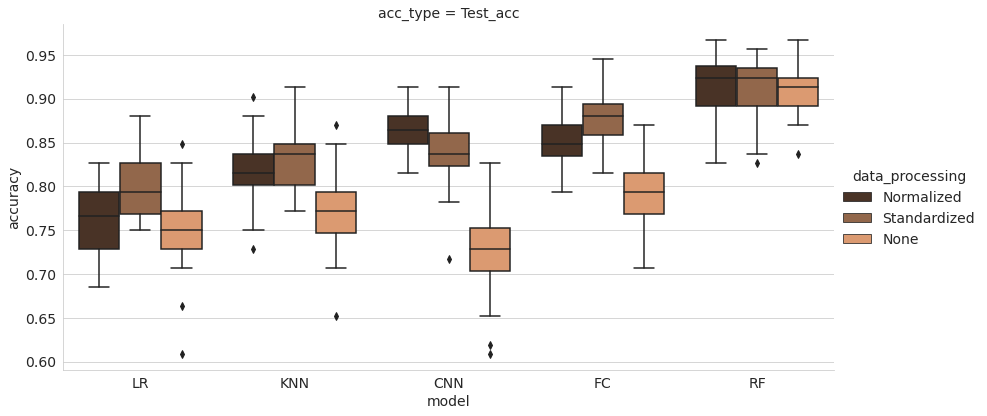

In [10]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})
plt.figure()
sns.catplot(data = data[data['acc_type']=='Test_acc'] , y='accuracy' , x = 'model' ,
            hue= 'data_processing'  , kind='box' ,  col='acc_type',
            palette = 'copper' , height=6 , aspect=16/8 , 
            )
#plt.savefig('/content/drive/MyDrive/thesis_data/acc_result_plot_violin.jpg')
plt.show()

## Data Imputation

In [11]:
cnn_fc = pd.read_csv('result/acc_cnn_fc_norm_all').reset_index(drop=True)
cnn_fc.head(2)

,Unnamed: 0,model,data_processing,impute_method,acc_type,accuracy
0,0,CNN,Normalized,Zero,Train_acc,0.942935
1,1,CNN,Normalized,Zero,Train_acc,0.980978


In [12]:
knn = pd.read_csv('result/acc_knn_norm_all').reset_index(drop=True)
knn = knn.replace('CNN' , 'KNN')
knn.head(2)

,Unnamed: 0,model,data_processing,impute_method,acc_type,accuracy
0,0,KNN,Normalized,Zero,Train_acc,0.942935
1,1,KNN,Normalized,Zero,Train_acc,0.980978


In [13]:
lr = pd.read_csv('result/acc_lr_norm_all').reset_index(drop=True)
lr.head(2)

,Unnamed: 0,model,data_processing,impute_method,acc_type,accuracy
0,0,LR,Normalized,Zero,Train_acc,0.796196
1,1,LR,Normalized,Zero,Train_acc,0.809783


In [14]:
rf = pd.read_csv('result/acc_rf_norm_all').reset_index(drop=True)
rf.head(2)

,Unnamed: 0,model,impute_method,data_processing,acc_type,accuracy
0,0,RF,Zero,Normalized,Train_acc,0.991848
1,1,RF,Zero,Normalized,Train_acc,0.991848


In [15]:
data  = pd.concat([lr , knn , cnn_fc , rf]).reset_index(drop=True)
data

,Unnamed: 0,model,data_processing,impute_method,acc_type,accuracy
0,0,LR,Normalized,Zero,Train_acc,0.796196
1,1,LR,Normalized,Zero,Train_acc,0.809783
2,2,LR,Normalized,Zero,Train_acc,0.812500
3,3,LR,Normalized,Zero,Train_acc,0.809783
4,4,LR,Normalized,Zero,Train_acc,0.804348
...,...,...,...,...,...,...
1531,251,RF,Normalized,correlation,Test_acc,0.934783
1532,252,RF,Normalized,correlation,Test_acc,0.923913
1533,253,RF,Normalized,correlation,Test_acc,0.913043
1534,254,RF,Normalized,correlation,Test_acc,0.923913


<Figure size 432x288 with 0 Axes>

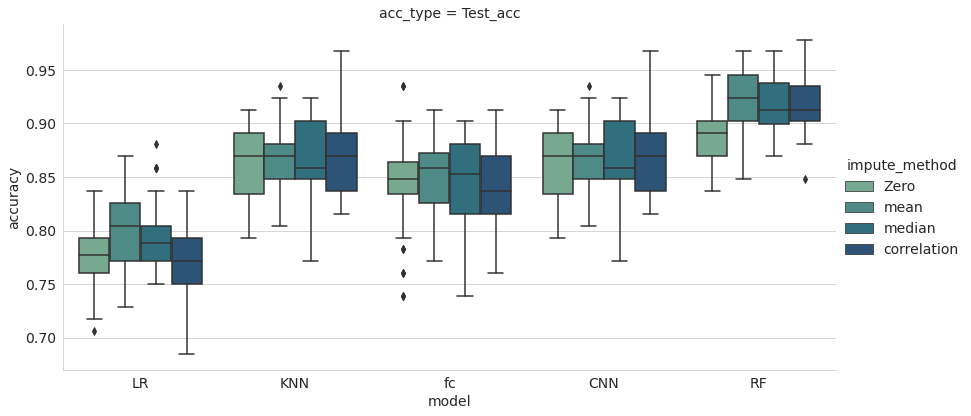

In [17]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})
plt.figure()
sns.catplot(data = data[data['acc_type']=='Test_acc'] , y='accuracy' , x = 'model' ,
            hue= 'impute_method'  , kind='box' ,  col='acc_type',
            palette = 'crest' , height=6 , aspect=16/8 , order=['LR' ,'KNN' , 'fc' , 'CNN' , 'RF']
            )
#plt.savefig('/content/drive/MyDrive/thesis_data/acc_result_plot_violin.jpg')
plt.show()